# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | The seats were excellent, ..."
1,✅ Trip Verified | After the nightmare of get...
2,✅ Trip Verified | Prior to boarding a gate a...
3,✅ Trip Verified | I flew from Amsterdam to L...
4,"✅ Trip Verified | First the good news, the clu..."


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [4]:
df.dtypes

,0
reviews,object


In [5]:
df['reviews'] = df['reviews'].astype(str)

In [6]:
#Remove parts before | in the reviews column
df['reviews'] = df['reviews'].str.split("|", expand = True)[1]

In [7]:
df

,reviews
0,"The seats were excellent, with a feel of mu..."
1,After the nightmare of getting through trip...
2,Prior to boarding a gate agent seemed to pi...
3,I flew from Amsterdam to Las Vegas with a l...
4,"First the good news, the club suites are such..."
...,...
995,Sydney to London via Singapore with British ...
996,London to Johannesburg. British Airways is o...
997,I have to say travelling in Club Europe is a ...
998,I had a stress free journey with my 8 yr old...


Data Preprocessing

In [8]:
#Cleaning the data
import re

def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,"The seats were excellent, with a feel of mu...",The seats were excellent with a feel of much ...
1,After the nightmare of getting through trip...,After the nightmare of getting through triple...
2,Prior to boarding a gate agent seemed to pi...,Prior to boarding a gate agent seemed to pick...
3,I flew from Amsterdam to Las Vegas with a l...,I flew from Amsterdam to Las Vegas with a lay...
4,"First the good news, the club suites are such...",First the good news the club suites are such ...


In [9]:
%pip install nltk

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from nltk.corpus import wordnet

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') # Download the missing data package
nltk.download('wordnet')
nltk.download('tagsets') #this line should be added to ensure nltk has access to all the required data for pos tagging including averaged_perceptron_tagger_eng
# Download 'averaged_perceptron_tagger_eng' specifically
nltk.download('averaged_perceptron_tagger_eng') # This line downloads the required resource.

# POS tagger dictionary
pos_dict = {'J': wordnet.ADJ, 'V': wordnet.VERB, 'N': wordnet.NOUN, 'R': wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


,reviews,Cleaned Reviews,POS tagged
0,"The seats were excellent, with a feel of mu...",The seats were excellent with a feel of much ...,"[(seats, n), (excellent, a), (feel, n), (much,..."
1,After the nightmare of getting through trip...,After the nightmare of getting through triple...,"[(nightmare, n), (getting, v), (triple, a), (s..."
2,Prior to boarding a gate agent seemed to pi...,Prior to boarding a gate agent seemed to pick...,"[(Prior, r), (boarding, v), (gate, n), (agent,..."
3,I flew from Amsterdam to Las Vegas with a l...,I flew from Amsterdam to Las Vegas with a lay...,"[(flew, v), (Amsterdam, n), (Las, n), (Vegas, ..."
4,"First the good news, the club suites are such...",First the good news the club suites are such ...,"[(First, r), (good, a), (news, n), (club, n), ..."


In [15]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,"The seats were excellent, with a feel of mu...",The seats were excellent with a feel of much ...,"[(seats, n), (excellent, a), (feel, n), (much,...",seat excellent feel much room official seat ...
1,After the nightmare of getting through trip...,After the nightmare of getting through triple...,"[(nightmare, n), (getting, v), (triple, a), (s...",nightmare get triple security Nairobi Airpor...
2,Prior to boarding a gate agent seemed to pi...,Prior to boarding a gate agent seemed to pick...,"[(Prior, r), (boarding, v), (gate, n), (agent,...",Prior board gate agent seem pick elderly peo...
3,I flew from Amsterdam to Las Vegas with a l...,I flew from Amsterdam to Las Vegas with a lay...,"[(flew, v), (Amsterdam, n), (Las, n), (Vegas, ...",fly Amsterdam Las Vegas layover Heathrow Nov...
4,"First the good news, the club suites are such...",First the good news the club suites are such ...,"[(First, r), (good, a), (news, n), (club, n), ...",First good news club suite huge improvement ...


In [16]:
df[['reviews', 'Lemma']]

,reviews,Lemma
0,"The seats were excellent, with a feel of mu...",seat excellent feel much room official seat ...
1,After the nightmare of getting through trip...,nightmare get triple security Nairobi Airpor...
2,Prior to boarding a gate agent seemed to pi...,Prior board gate agent seem pick elderly peo...
3,I flew from Amsterdam to Las Vegas with a l...,fly Amsterdam Las Vegas layover Heathrow Nov...
4,"First the good news, the club suites are such...",First good news club suite huge improvement ...
...,...,...
995,Sydney to London via Singapore with British ...,Sydney London via Singapore British Airways ...
996,London to Johannesburg. British Airways is o...,London Johannesburg British Airways one comm...
997,I have to say travelling in Club Europe is a ...,say travel Club Europe waste money food good...
998,I had a stress free journey with my 8 yr old...,stress free journey yr old autistic son yr o...


In [17]:
%pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:00


In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,"The seats were excellent, with a feel of mu...",The seats were excellent with a feel of much ...,"[(seats, n), (excellent, a), (feel, n), (much,...",seat excellent feel much room official seat ...,0.5719,Positive
1,After the nightmare of getting through trip...,After the nightmare of getting through triple...,"[(nightmare, n), (getting, v), (triple, a), (s...",nightmare get triple security Nairobi Airpor...,0.9674,Positive
2,Prior to boarding a gate agent seemed to pi...,Prior to boarding a gate agent seemed to pick...,"[(Prior, r), (boarding, v), (gate, n), (agent,...",Prior board gate agent seem pick elderly peo...,-0.6486,Negative
3,I flew from Amsterdam to Las Vegas with a l...,I flew from Amsterdam to Las Vegas with a lay...,"[(flew, v), (Amsterdam, n), (Las, n), (Vegas, ...",fly Amsterdam Las Vegas layover Heathrow Nov...,-0.8458,Negative
4,"First the good news, the club suites are such...",First the good news the club suites are such ...,"[(First, r), (good, a), (news, n), (club, n), ...",First good news club suite huge improvement ...,0.9200,Positive


In [19]:
vader_counts = df['Analysis'].value_counts()
vader_counts

,count
Analysis,
Positive,460
Negative,426
Neutral,114


([<matplotlib.patches.Wedge at 0x7eee26946310>,
 [Text(0.13786652831108215, 1.0913261750601648, 'Positive'),
  Text(-0.511666137747723, -0.9737544677598806, 'Negative'),
  Text(1.2643423691745355, -0.47322127330681485, 'Neutral')],
 [Text(0.07519992453331752, 0.5952688227600899, '46.0%'),
  Text(-0.27909062058966705, -0.5311388005962985, '42.6%'),
  Text(0.7960674176284112, -0.29795413504503154, '11.4%')])

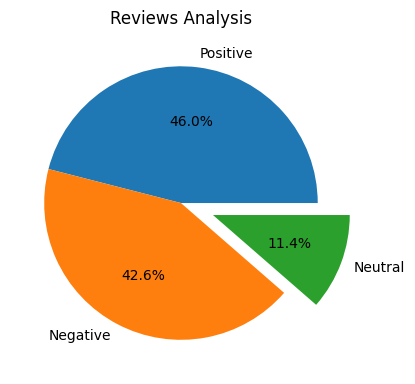

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [21]:
df.to_csv("BA_reviews.csv")

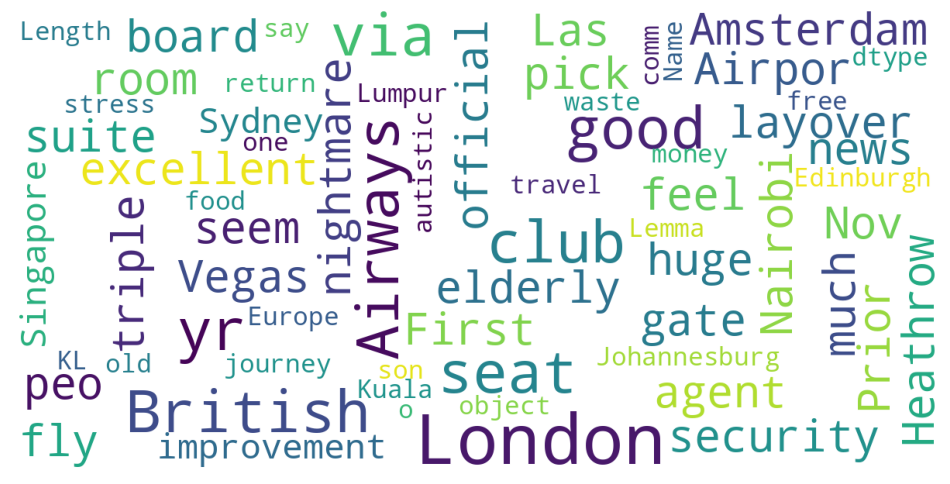

In [22]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)